# Chapter 1_6 泊松回归
----
author: W.Y.  
first_edition: 2020/1/16  
last_edition: 2020/1/28  
description: 王汉生老师书的第七章，生存分析的python极简实现  

----

In [7]:
# 导入模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 画图模块
import matplotlib
import seaborn as sns
import statsmodels.formula.api as smf  
import statsmodels.api as sma
import lmdiag  
from sklearn import metrics
from lifelines import CoxPHFitter
from lifelines import KaplanMeierFitter

In [2]:
# 导入数据

data = pd.read_csv('E:\Data Mining\SimplePython\Chapter 1 从R到Python\CH 1_7 生存分析\CH 1_7 data.csv')

In [3]:
data.head(20)

,Time,VStatus,HGB,Platelet,Age,LogWBC,LogPBM,Protein,SCalc
0,4.00,0,10.2,1,59,4.0453,0.7782,12,10
1,4.00,0,10.0,1,49,3.9590,1.6232,0,13
2,7.00,0,12.4,1,48,3.7993,1.8573,0,10
3,7.00,0,10.2,1,81,3.5911,1.8808,0,11
4,8.00,0,9.9,1,57,3.8325,1.6532,0,8
5,12.00,0,11.6,1,46,3.6435,1.1461,0,7
6,11.00,0,14.0,1,60,3.7324,1.8451,3,9
7,12.00,0,8.8,1,66,3.8388,1.3617,0,9
8,13.00,0,4.9,0,71,3.6435,1.7924,0,9
9,16.00,0,13.0,1,55,3.8573,0.9031,0,9


In [6]:
# 生存分析。会自动排除截断数据，所以书中前两步就不用了
cph = CoxPHFitter()
cph.fit(data, duration_col='Time', event_col='VStatus')
cph.print_summary()  

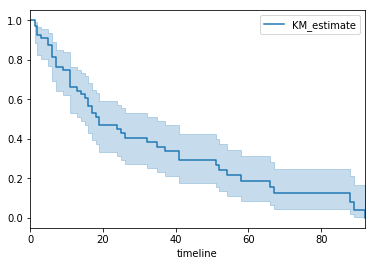

In [10]:
kmf = KaplanMeierFitter()
kmf.fit(data['Time'], event_observed=data['VStatus'])

kmf.plot()

In [11]:
data['status'] = data['HGB'].apply(lambda x: 1 if x>data['HGB'].median() else 0)

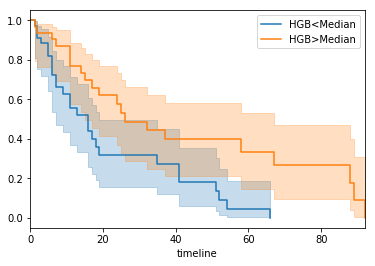

In [15]:
kmf = KaplanMeierFitter()
HGB_group = (data['status'] == 1)
 
kmf.fit(data['Time'][~HGB_group], data['VStatus'][~HGB_group], label='HGB<Median')
ax = kmf.plot()
 
kmf.fit(data['Time'][HGB_group], data['VStatus'][HGB_group], label='HGB>Median')
kmf.plot(ax=ax)

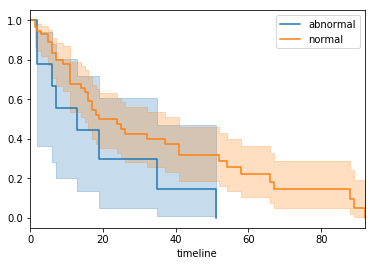

In [17]:
kmf = KaplanMeierFitter()
Platelet = (data['Platelet'] == 1)
 
kmf.fit(data['Time'][~Platelet], data['VStatus'][~Platelet], label='abnormal')
ax = kmf.plot()
 
kmf.fit(data['Time'][Platelet], data['VStatus'][Platelet], label='normal')
kmf.plot(ax=ax)